In [2]:
%load_ext autoreload
%autoreload 2

import torch
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles

from neural_gas import SupervisedNeuralGas

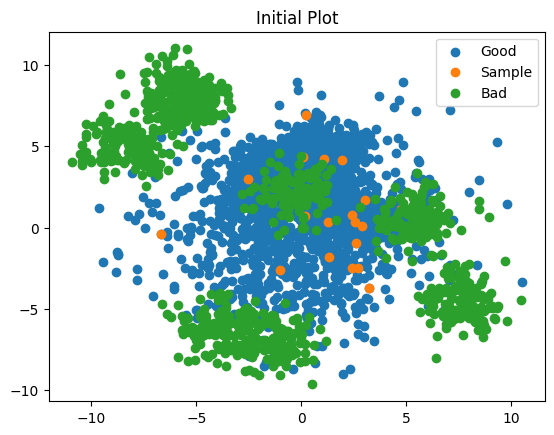

In [6]:
guide1, _ = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=0)
guide2, _ = make_circles(n_samples=1000, noise = 3, random_state=5)
bad, _ = make_blobs(n_samples=1000, centers=8, n_features=2, random_state=5)

guide = np.concatenate([guide1, guide2], axis=0)
guide = torch.tensor(guide, dtype=torch.float32, device="cuda")
bad = torch.tensor(bad, dtype=torch.float32, device="cuda")


perm = torch.randperm(guide.shape[0])
idx = perm[:int(0.01*guide.shape[0])]
sample = guide[idx, :]


plt.scatter(guide[:, 0].detach().cpu().numpy(), guide[:, 1].detach().cpu().numpy(), label='Good')
plt.scatter(sample[:, 0].detach().cpu().numpy(), sample[:, 1].detach().cpu().numpy(), label='Sample')
plt.scatter(bad[:, 0].detach().cpu().numpy(), bad[:, 1].detach().cpu().numpy(), label='Bad')
plt.legend()
plt.title("Initial Plot")
plt.show()

In [8]:
SNG = SupervisedNeuralGas(sample, guide, bad)
SNG.to(device="cuda")

moved = SNG(epochs=100,
            a_o=10,
            k_o=100,
            a_on=0.05,
            k_on=1,
            a_r=0.1,
            k_r=0.5,
            a_rn=0.05,
            k_rn=0.5,
            verbose=True).detach().cpu().numpy()

  5%|▌         | 5/100 [00:07<02:30,  1.59s/it]
